In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.model import *
from ts.utility import Utility, Metric
from ts.plot import Plot

%matplotlib inline

# Data

In [2]:
n = 2000

univarData = StandardGenerator('simple').generate(n)
print(univarData.shape, univarData.dtype)

(2000,) float64


In [3]:
trainSize = 1500

trainData, testData = Utility.trainTestSplit(univarData, trainSize,)

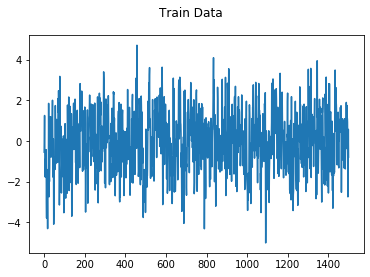

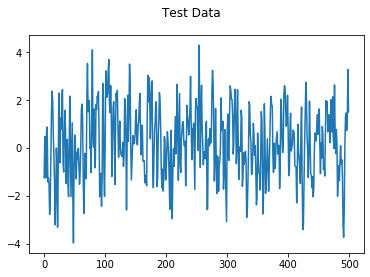

In [4]:
Plot.plotDataCols(trainData, title='Train Data')
Plot.plotDataCols(testData, title='Test Data')

In [5]:
trainSequences = Utility.breakSeq(
    np.expand_dims(trainData, axis=1),
    seqLength=500
)

In [20]:
def displayMetrics(pred, target):
    
    mape = float(Metric.mape(pred, target))
    mae = float(Metric.mae(pred, target))
    mpe = float(Metric.mpe(pred, target))
    mse = float(Metric.mse(pred, target))
    rmse = float(Metric.rmse(pred, target))

    print(
        f'MAPE: {mape: .2f} MAE: {mae: .2f} '
        + f'MPE: {mpe: .2f} MSE: {mse: .2f} RMSE: {rmse: .2f}'
    )

## GMM-HMM model

Text(0.5, 1.0, 'Log Likelihood vs. Iters.')

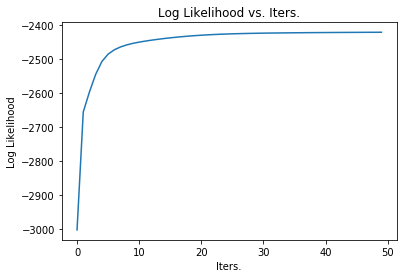

In [7]:
numStates = 4
numMixtureComp = 3
dimension = 1
d = 10
numIterations = 50
threshold = 0.0

model = GmmHmmForecast(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    d=d,
    numIterations=numIterations,
    threshold=threshold
)

likelihoodValues = model.train([np.expand_dims(trainData, axis=1)])
plt.plot(likelihoodValues)
plt.xlabel('Iters.')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iters.')

(490, 1) (490, 1)


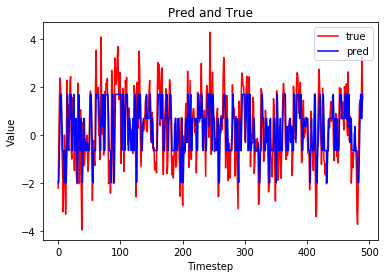

In [13]:
minValue = trainData.min()
maxValue = trainData.max()
numValues = 30
discParamSet = [np.linspace(minValue, maxValue, numValues)]

pred = model.predict(np.expand_dims(testData, axis=1), discParamSet)
target = np.expand_dims(testData[d:], axis=1)

print(pred.shape, target.shape)
Plot.plotPredTrue(pred, target)

In [21]:
displayMetrics(pred, target)

MAPE:  434.08 MAE:  1.05 MPE:  134.16 MSE:  1.75 RMSE:  1.32


## GMM HMM Likelihood Similarity Model

Text(0.5, 1.0, 'Log Likelihood vs. Iters.')

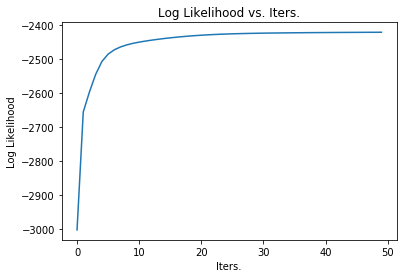

In [22]:
numStates = 4
numMixtureComp = 3
dimension = 1
numIterations = 50
threshold = 0.0

model = GmmHmmLikelihoodSimilarity(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    numIterations=numIterations,
    threshold=threshold
)

likelihoodValues = model.train([np.expand_dims(trainData, axis=1)])
plt.plot(likelihoodValues)
plt.xlabel('Iters.')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iters.')

(499, 1) (499, 1)


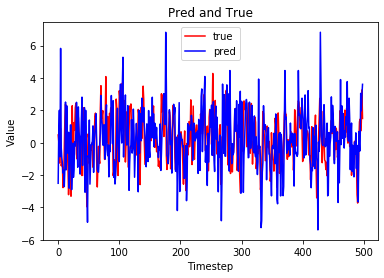

In [28]:
pred = model.predict(np.expand_dims(testData, axis=1))[:testData.shape[0] - 1]
target = np.expand_dims(testData[1:], axis=1)

print(pred.shape, target.shape)
Plot.plotPredTrue(pred, target)

In [29]:
displayMetrics(pred, target)

MAPE:  419.94 MAE:  1.50 MPE:  104.33 MSE:  3.57 RMSE:  1.89


## GRU model

Epoch 1/25
3/3 [==============================] - 1s 224ms/step - loss: 2.0479
Epoch 2/25
3/3 [==============================] - 1s 210ms/step - loss: 1.9963
Epoch 3/25
3/3 [==============================] - 1s 207ms/step - loss: 1.9538
Epoch 4/25
3/3 [==============================] - 1s 209ms/step - loss: 1.9106
Epoch 5/25
3/3 [==============================] - 1s 211ms/step - loss: 1.8689
Epoch 6/25
3/3 [==============================] - 1s 206ms/step - loss: 1.8238
Epoch 7/25
3/3 [==============================] - 1s 207ms/step - loss: 1.7827
Epoch 8/25
3/3 [==============================] - 1s 206ms/step - loss: 1.7457
Epoch 9/25
3/3 [==============================] - 1s 204ms/step - loss: 1.7079
Epoch 10/25
3/3 [==============================] - 1s 205ms/step - loss: 1.6672
Epoch 11/25
3/3 [==============================] - 1s 212ms/step - loss: 1.6214
Epoch 12/25
3/3 [==============================] - 1s 216ms/step - loss: 1.5647
Epoch 13/25
3/3 [==============================] 

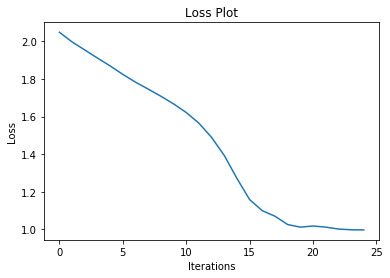

In [37]:
forecastHorizon = 1
stateSize = 20
activation = 'tanh'
numRnnLayers = 3
numTargetVariables = 1
numExoVariables = 0

model = GruForecast(
    forecastHorizon=forecastHorizon,
    stateSize=stateSize,
    activation=activation,
    numRnnLayers=numRnnLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

numIterations = 25
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences=trainSequences,
    numIterations=numIterations
)

Plot.plotLoss(losses)

(499, 1) (499, 1)


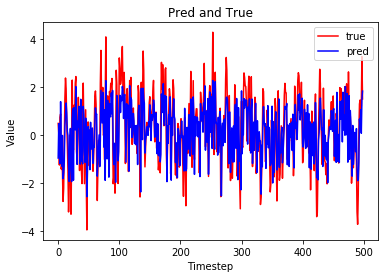

In [38]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = np.expand_dims(testData[forecastHorizon:], axis=1)

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [39]:
displayMetrics(pred, target)

MAPE:  328.00 MAE:  0.84 MPE:  169.84 MSE:  1.08 RMSE:  1.04


## LSTM

Epoch 1/25
3/3 [==============================] - 1s 190ms/step - loss: 2.1017
Epoch 2/25
3/3 [==============================] - 1s 184ms/step - loss: 2.0866
Epoch 3/25
3/3 [==============================] - 1s 182ms/step - loss: 2.0742
Epoch 4/25
3/3 [==============================] - 1s 184ms/step - loss: 2.0610
Epoch 5/25
3/3 [==============================] - 1s 200ms/step - loss: 2.0418
Epoch 6/25
3/3 [==============================] - 1s 195ms/step - loss: 2.0177
Epoch 7/25
3/3 [==============================] - 1s 207ms/step - loss: 1.9958
Epoch 8/25
3/3 [==============================] - 1s 215ms/step - loss: 1.9726
Epoch 9/25
3/3 [==============================] - 1s 197ms/step - loss: 1.9466
Epoch 10/25
3/3 [==============================] - 1s 199ms/step - loss: 1.9119
Epoch 11/25
3/3 [==============================] - 1s 187ms/step - loss: 1.8821
Epoch 12/25
3/3 [==============================] - 1s 194ms/step - loss: 1.8290
Epoch 13/25
3/3 [==============================] 

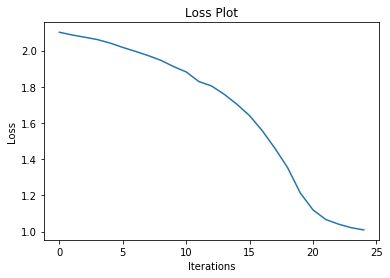

In [45]:
forecastHorizon = 1
stateSize = 20
activation = 'tanh'
numRnnLayers = 3
numTargetVariables = 1
numExoVariables = 0

model = LstmForecast(
    forecastHorizon=forecastHorizon,
    stateSize=stateSize,
    activation=activation,
    numRnnLayers=numRnnLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

numIterations = 25
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences=trainSequences,
    numIterations=numIterations
)

Plot.plotLoss(losses)

(499, 1) (499, 1)


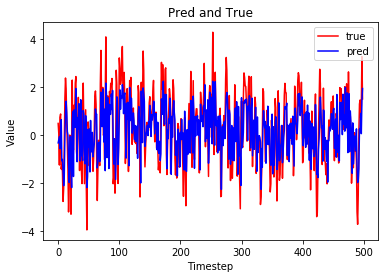

In [46]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = np.expand_dims(testData[forecastHorizon:], axis=1)

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [47]:
displayMetrics(pred, target)

MAPE:  326.84 MAE:  0.85 MPE:  177.14 MSE:  1.09 RMSE:  1.04


## Extreme Model 1

begin iteration 0
Completed Iteration: 0 | time taken:  5.32 sec | Avg Iteration Loss: 2.0989586138079583
begin iteration 1
Completed Iteration: 1 | time taken:  5.46 sec | Avg Iteration Loss: 1.8479511035213358
begin iteration 2
Completed Iteration: 2 | time taken:  5.23 sec | Avg Iteration Loss: 1.7381850633188198
begin iteration 3
Completed Iteration: 3 | time taken:  5.07 sec | Avg Iteration Loss: 1.6498811605949308
begin iteration 4
Completed Iteration: 4 | time taken:  5.16 sec | Avg Iteration Loss: 1.4527635136713535
begin iteration 5
Completed Iteration: 5 | time taken:  4.42 sec | Avg Iteration Loss: 1.3087684459582372
begin iteration 6
Completed Iteration: 6 | time taken:  4.67 sec | Avg Iteration Loss: 1.1640331876088932
begin iteration 7
Completed Iteration: 7 | time taken:  4.36 sec | Avg Iteration Loss: 1.1330118397676077
begin iteration 8
Completed Iteration: 8 | time taken:  4.58 sec | Avg Iteration Loss: 1.0766063363074736
begin iteration 9
Completed Iteration: 9 | tim

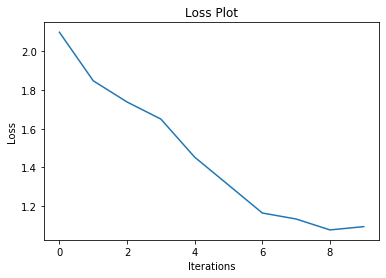

In [48]:
forecastHorizon = 1
memorySize = 20
windowSize = 10
encoderStateSize = 10
lstmStateSize = 10
numExoVariables = 0

model = ExtremeTime(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    encoderStateSize=encoderStateSize,
    lstmStateSize=lstmStateSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)


losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(499,) (499,)


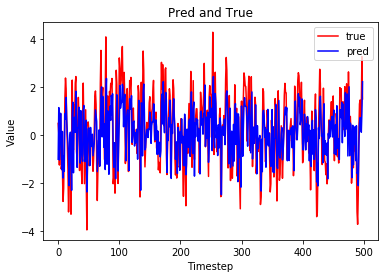

In [49]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [50]:
displayMetrics(pred, target)

MAPE:  290.61 MAE:  0.86 MPE:  163.36 MSE:  1.14 RMSE:  1.07


## Extreme Model 2

begin iteration 0
Completed Iteration: 0 | time taken:  5.83 sec | Avg Iteration Loss: 1.9226667376675184
begin iteration 1
Completed Iteration: 1 | time taken:  5.97 sec | Avg Iteration Loss: 1.6128298440188094
begin iteration 2
Completed Iteration: 2 | time taken:  6.97 sec | Avg Iteration Loss: 1.5062525083589993
begin iteration 3
Completed Iteration: 3 | time taken:  6.89 sec | Avg Iteration Loss: 1.284022826671536
begin iteration 4
Completed Iteration: 4 | time taken:  6.50 sec | Avg Iteration Loss: 1.140927238693845
begin iteration 5
Completed Iteration: 5 | time taken:  6.56 sec | Avg Iteration Loss: 1.0696323862882278
begin iteration 6
Completed Iteration: 6 | time taken:  5.72 sec | Avg Iteration Loss: 1.06253261632103
begin iteration 7
Completed Iteration: 7 | time taken:  6.85 sec | Avg Iteration Loss: 1.032837463161971
begin iteration 8
Completed Iteration: 8 | time taken:  5.28 sec | Avg Iteration Loss: 1.0286005327260195
begin iteration 9
Completed Iteration: 9 | time tak

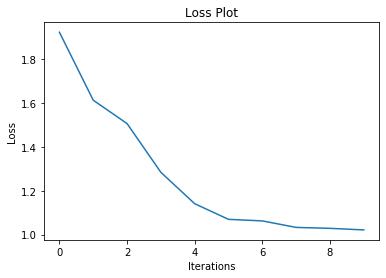

In [51]:
forecastHorizon = 1
memorySize = 20
windowSize = 10
embeddingSize = 10
contextSize = 10
numExoVariables = 0

model = ExtremeTime2(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    embeddingSize=embeddingSize,
    contextSize=contextSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(499,) (499,)


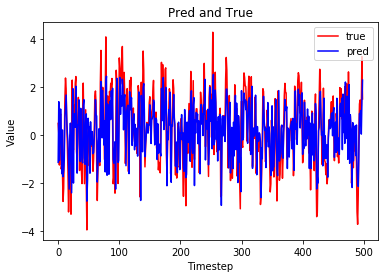

In [52]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [53]:
displayMetrics(pred, target)

MAPE:  301.57 MAE:  0.85 MPE:  139.27 MSE:  1.10 RMSE:  1.05


## MLP

Epoch 1/10
3/3 [==============================] - 0s 1ms/step - loss: 2.6423
Epoch 2/10
3/3 [==============================] - 0s 1ms/step - loss: 2.0047
Epoch 3/10
3/3 [==============================] - 0s 1ms/step - loss: 1.6160
Epoch 4/10
3/3 [==============================] - 0s 1ms/step - loss: 1.5345
Epoch 5/10
3/3 [==============================] - 0s 1ms/step - loss: 1.3897
Epoch 6/10
3/3 [==============================] - 0s 1ms/step - loss: 1.3117
Epoch 7/10
3/3 [==============================] - 0s 1ms/step - loss: 1.2551
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 1.2057
Epoch 9/10
3/3 [==============================] - 0s 1ms/step - loss: 1.1547
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 1.1159


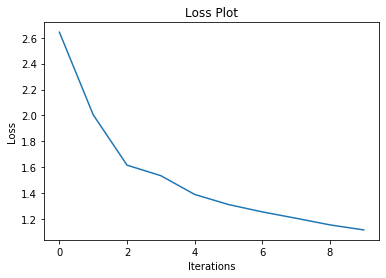

In [54]:
forecastHorizon = 1
lag = 10
activation = 'relu'
numUnitsPerLayer = 10
numLayers = 1
numTargetVariables = 1
numExoVariables = 0

model = DeepNN(
    forecastHorizon=1,
    lag=lag,
    activation=activation,
    numUnitsPerLayer=numUnitsPerLayer,
    numLayers=numLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

numIterations = 10
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences,
    numIterations=numIterations,
    optimizer=optimizer
)
Plot.plotLoss(losses)

(489,) (489,)


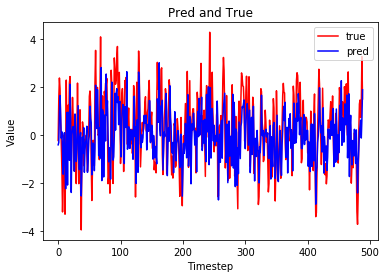

In [55]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[lag + forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

In [56]:
displayMetrics(pred, target)

MAPE:  309.46 MAE:  0.95 MPE:  167.18 MSE:  1.37 RMSE:  1.17
